#  ARIMA
-  Auto-Arima

# AutoRegressive Integrated Moving Average (ARIMA) model
ARIMA is one of the time series forecasting models. It is a general class of models that includes different varieties.
#### A standard notation is used of ARIMA(p,d,q) .
- p: The number of lag observations included in the model, also called the lag order.
- d: The number of times that the raw observations are differenced, also called the degree of differencing.
- q: The size of the moving average window, also called the order of moving average.
- The values of p,q, and d, can  also finding by auto arima model, which find best values of the p,d,and q.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("daily_melborne_temperatures.csv",index_col = 'Date')
data.index = pd.to_datetime(data.index)
print("The shape of the data :",data.shape)
data.head()

The shape of the data : (3650, 1)


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [3]:
# checking for missing values
data.isnull().sum()

Temp    0
dtype: int64

In [4]:
# trian and test set
train = data[:round(len(data) * 0.9)]
test = data[round(len(data) * 0.9):]
print(f"Shape of train data : {train.shape}")
print(f"Shape of test data : {test.shape}")

Shape of train data : (3285, 1)
Shape of test data : (365, 1)


In [5]:
train.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


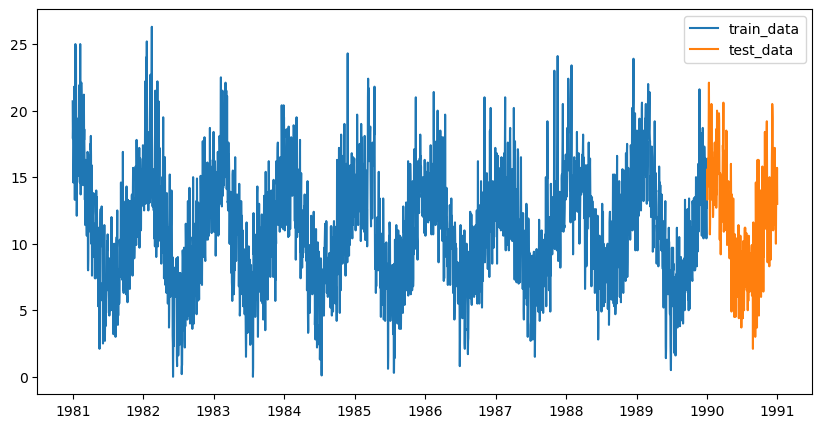

In [6]:
# univarite time series plot

plt.figure(figsize = (10,5))
plt.plot(train, label = 'train_data')
plt.plot(test,label = 'test_data')
plt.legend();

### model training with  auto_arima modules

In [7]:
#building the model
# from pyramid.arima import auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=15146.175, Time=2.85 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=18581.883, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=15577.566, Time=0.30 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=16735.718, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=25568.457, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=15177.341, Time=1.61 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=15187.986, Time=2.44 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=15146.521, Time=3.45 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=15146.864, Time=4.58 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=15531.697, Time=0.72 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=15145.231, Time=2.15 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=15978.323, Time=1.03 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=15146.752, Time=2.45 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=16199.160, Time=0.78 sec
 ARIMA(0,0,4)(0,0,0

ARIMA(order=(1, 0, 3), scoring_args={}, suppress_warnings=True)

### prediction on train data

In [8]:
# forecasting on test data
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,columns=['Prediction'])
forecast.index = test.index
forecast.head()

C:\Users\Shubham Soni\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,Prediction
Date,
1990-01-01,12.752054
1990-01-02,13.012399
1990-01-03,13.160983
1990-01-04,13.147800
1990-01-05,13.134717


### prediction on test data

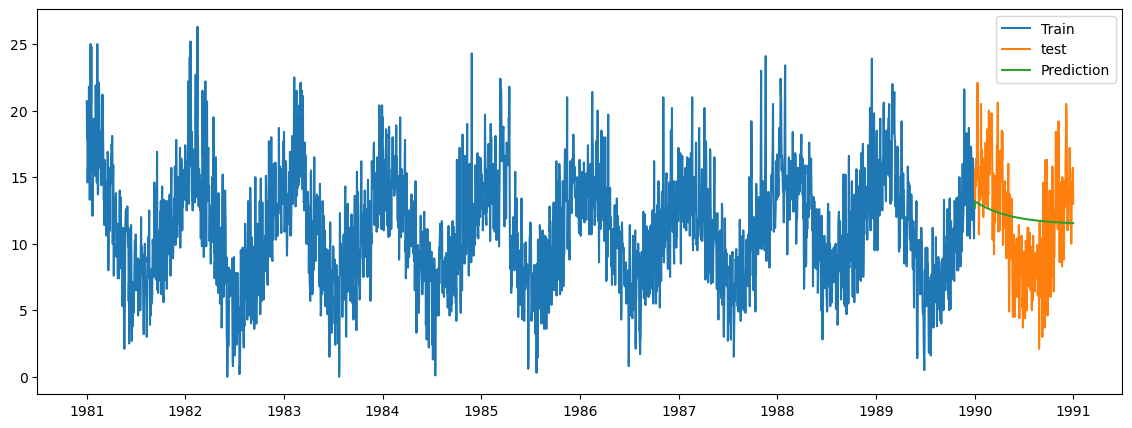

In [9]:
#plot the predictions for test data
plt.figure(figsize = (14,5))
plt.plot(train, label='Train')
plt.plot(test, label='test')
plt.plot(forecast, label='Prediction')
plt.legend()
plt.show()

In [10]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(test,forecast))
print("The root square mean erro :",rms)
print("The mean value of  the data: ",data.mean())

The root square mean erro : 3.695201266063187
The mean value of  the data:  Temp    11.177753
dtype: float64
